In [6]:
%run train.py --name "baseline" --data "/content/drive/MyDrive/contest01_data" --gpu

Reading data...






  0%|          | 0/64001 [00:00<?, ?it/s]



  0%|          | 183/64001 [00:00<00:34, 1826.88it/s]



  1%|          | 338/64001 [00:00<00:36, 1730.73it/s]



  1%|          | 479/64001 [00:00<00:39, 1617.52it/s]



  1%|          | 652/64001 [00:00<00:38, 1649.68it/s]



  1%|▏         | 813/64001 [00:00<00:38, 1635.82it/s]



  2%|▏         | 967/64001 [00:00<00:39, 1604.77it/s]



  2%|▏         | 1131/64001 [00:00<00:38, 1614.35it/s]



  2%|▏         | 1292/64001 [00:00<00:38, 1611.04it/s]



  2%|▏         | 1452/64001 [00:00<00:38, 1606.61it/s]



  3%|▎         | 1619/64001 [00:01<00:38, 1624.02it/s]



  3%|▎         | 1792/64001 [00:01<00:37, 1652.54it/s]



  3%|▎         | 1954/64001 [00:01<00:38, 1611.84it/s]



  3%|▎         | 2114/64001 [00:01<00:39, 1548.50it/s]



  4%|▎         | 2268/64001 [00:01<00:40, 1516.71it/s]



  4%|▍         | 2431/64001 [00:01<00:39, 1548.34it/s]



  4%|▍         | 2597/64001 [00:01<00:38, 1579.20it/s]



  4%|▍         | 2767/64001 [

Creating model...







training...:   0%|          | 0/99 [00:00<?, ?it/s]

Ready for training...







training...:   1%|          | 1/99 [00:38<1:02:21, 38.18s/it]




training...:   2%|▏         | 2/99 [00:55<51:30, 31.86s/it]  




training...:   3%|▎         | 3/99 [01:12<43:56, 27.46s/it]




training...:   4%|▍         | 4/99 [01:29<38:33, 24.35s/it]




training...:   5%|▌         | 5/99 [01:46<34:48, 22.22s/it]




training...:   6%|▌         | 6/99 [02:04<32:06, 20.71s/it]




training...:   7%|▋         | 7/99 [02:21<30:02, 19.59s/it]




training...:   8%|▊         | 8/99 [02:38<28:34, 18.84s/it]




training...:   9%|▉         | 9/99 [02:55<27:24, 18.28s/it]




training...:  10%|█         | 10/99 [03:11<26:29, 17.86s/it]




training...:  11%|█         | 11/99 [03:28<25:46, 17.58s/it]




training...:  12%|█▏        | 12/99 [03:45<25:13, 17.40s/it]




training...:  13%|█▎        | 13/99 [04:03<25:01, 17.45s/it]




training...:  14%|█▍        | 14/99 [04:20<24:25, 17.24s/it]




training...:  15%|█▌        | 15/99 [04:37<24:00, 17.15s/it]




training...:  16%|█▌     

Epoch # 0:	train loss: 2.4e+03	val loss: 1.1e+03







test prediction...:   0%|          | 0/32 [00:00<?, ?it/s]




test prediction...:   3%|▎         | 1/32 [02:15<1:09:55, 135.32s/it]




test prediction...:   6%|▋         | 2/32 [02:28<49:23, 98.80s/it]   




test prediction...:   9%|▉         | 3/32 [02:47<36:03, 74.60s/it]




test prediction...:  12%|█▎        | 4/32 [03:01<26:26, 56.65s/it]




test prediction...:  16%|█▌        | 5/32 [03:16<19:49, 44.06s/it]




test prediction...:  19%|█▉        | 6/32 [03:31<15:18, 35.31s/it]




test prediction...:  22%|██▏       | 7/32 [03:46<12:08, 29.13s/it]




test prediction...:  25%|██▌       | 8/32 [04:00<09:55, 24.83s/it]




test prediction...:  28%|██▊       | 9/32 [04:15<08:23, 21.88s/it]




test prediction...:  31%|███▏      | 10/32 [04:30<07:13, 19.71s/it]




test prediction...:  34%|███▍      | 11/32 [04:49<06:46, 19.35s/it]




test prediction...:  38%|███▊      | 12/32 [05:03<05:58, 17.91s/it]




test prediction...:  41%|████      | 13/32 [05:18<05:25, 17.13s/it]





In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import cv2
import os

np.random.seed(1234)

In [8]:
TEST_PREDICTIONS_FILENAME = "/content/runs/baseline_test_predictions.pkl"
NUM_IMAGES_TO_SHOW = 16
NUM_COLS = 4
NUM_ROWS = NUM_IMAGES_TO_SHOW // NUM_COLS + int(NUM_IMAGES_TO_SHOW % NUM_COLS != 0)

In [9]:
def draw_landmarks(image, landmarks):
    for point in landmarks:
        x, y = point.astype(np.int)
        cv2.circle(image, (x, y), 1, (128, 0, 128), 1, -1)
    return image

In [10]:
with open(TEST_PREDICTIONS_FILENAME, "rb") as fp:
    results = pickle.load(fp)
image_names = results["image_names"]
landmarks = results["landmarks"]

print("Images:", len(image_names))
print("Landmarks shape:", landmarks.shape)

if len(image_names) < NUM_IMAGES_TO_SHOW:
    raise RuntimeError(f"Choose less images to show, you have only {len(image_names)}")

Images: 16000
Landmarks shape: (16000, 971, 2)


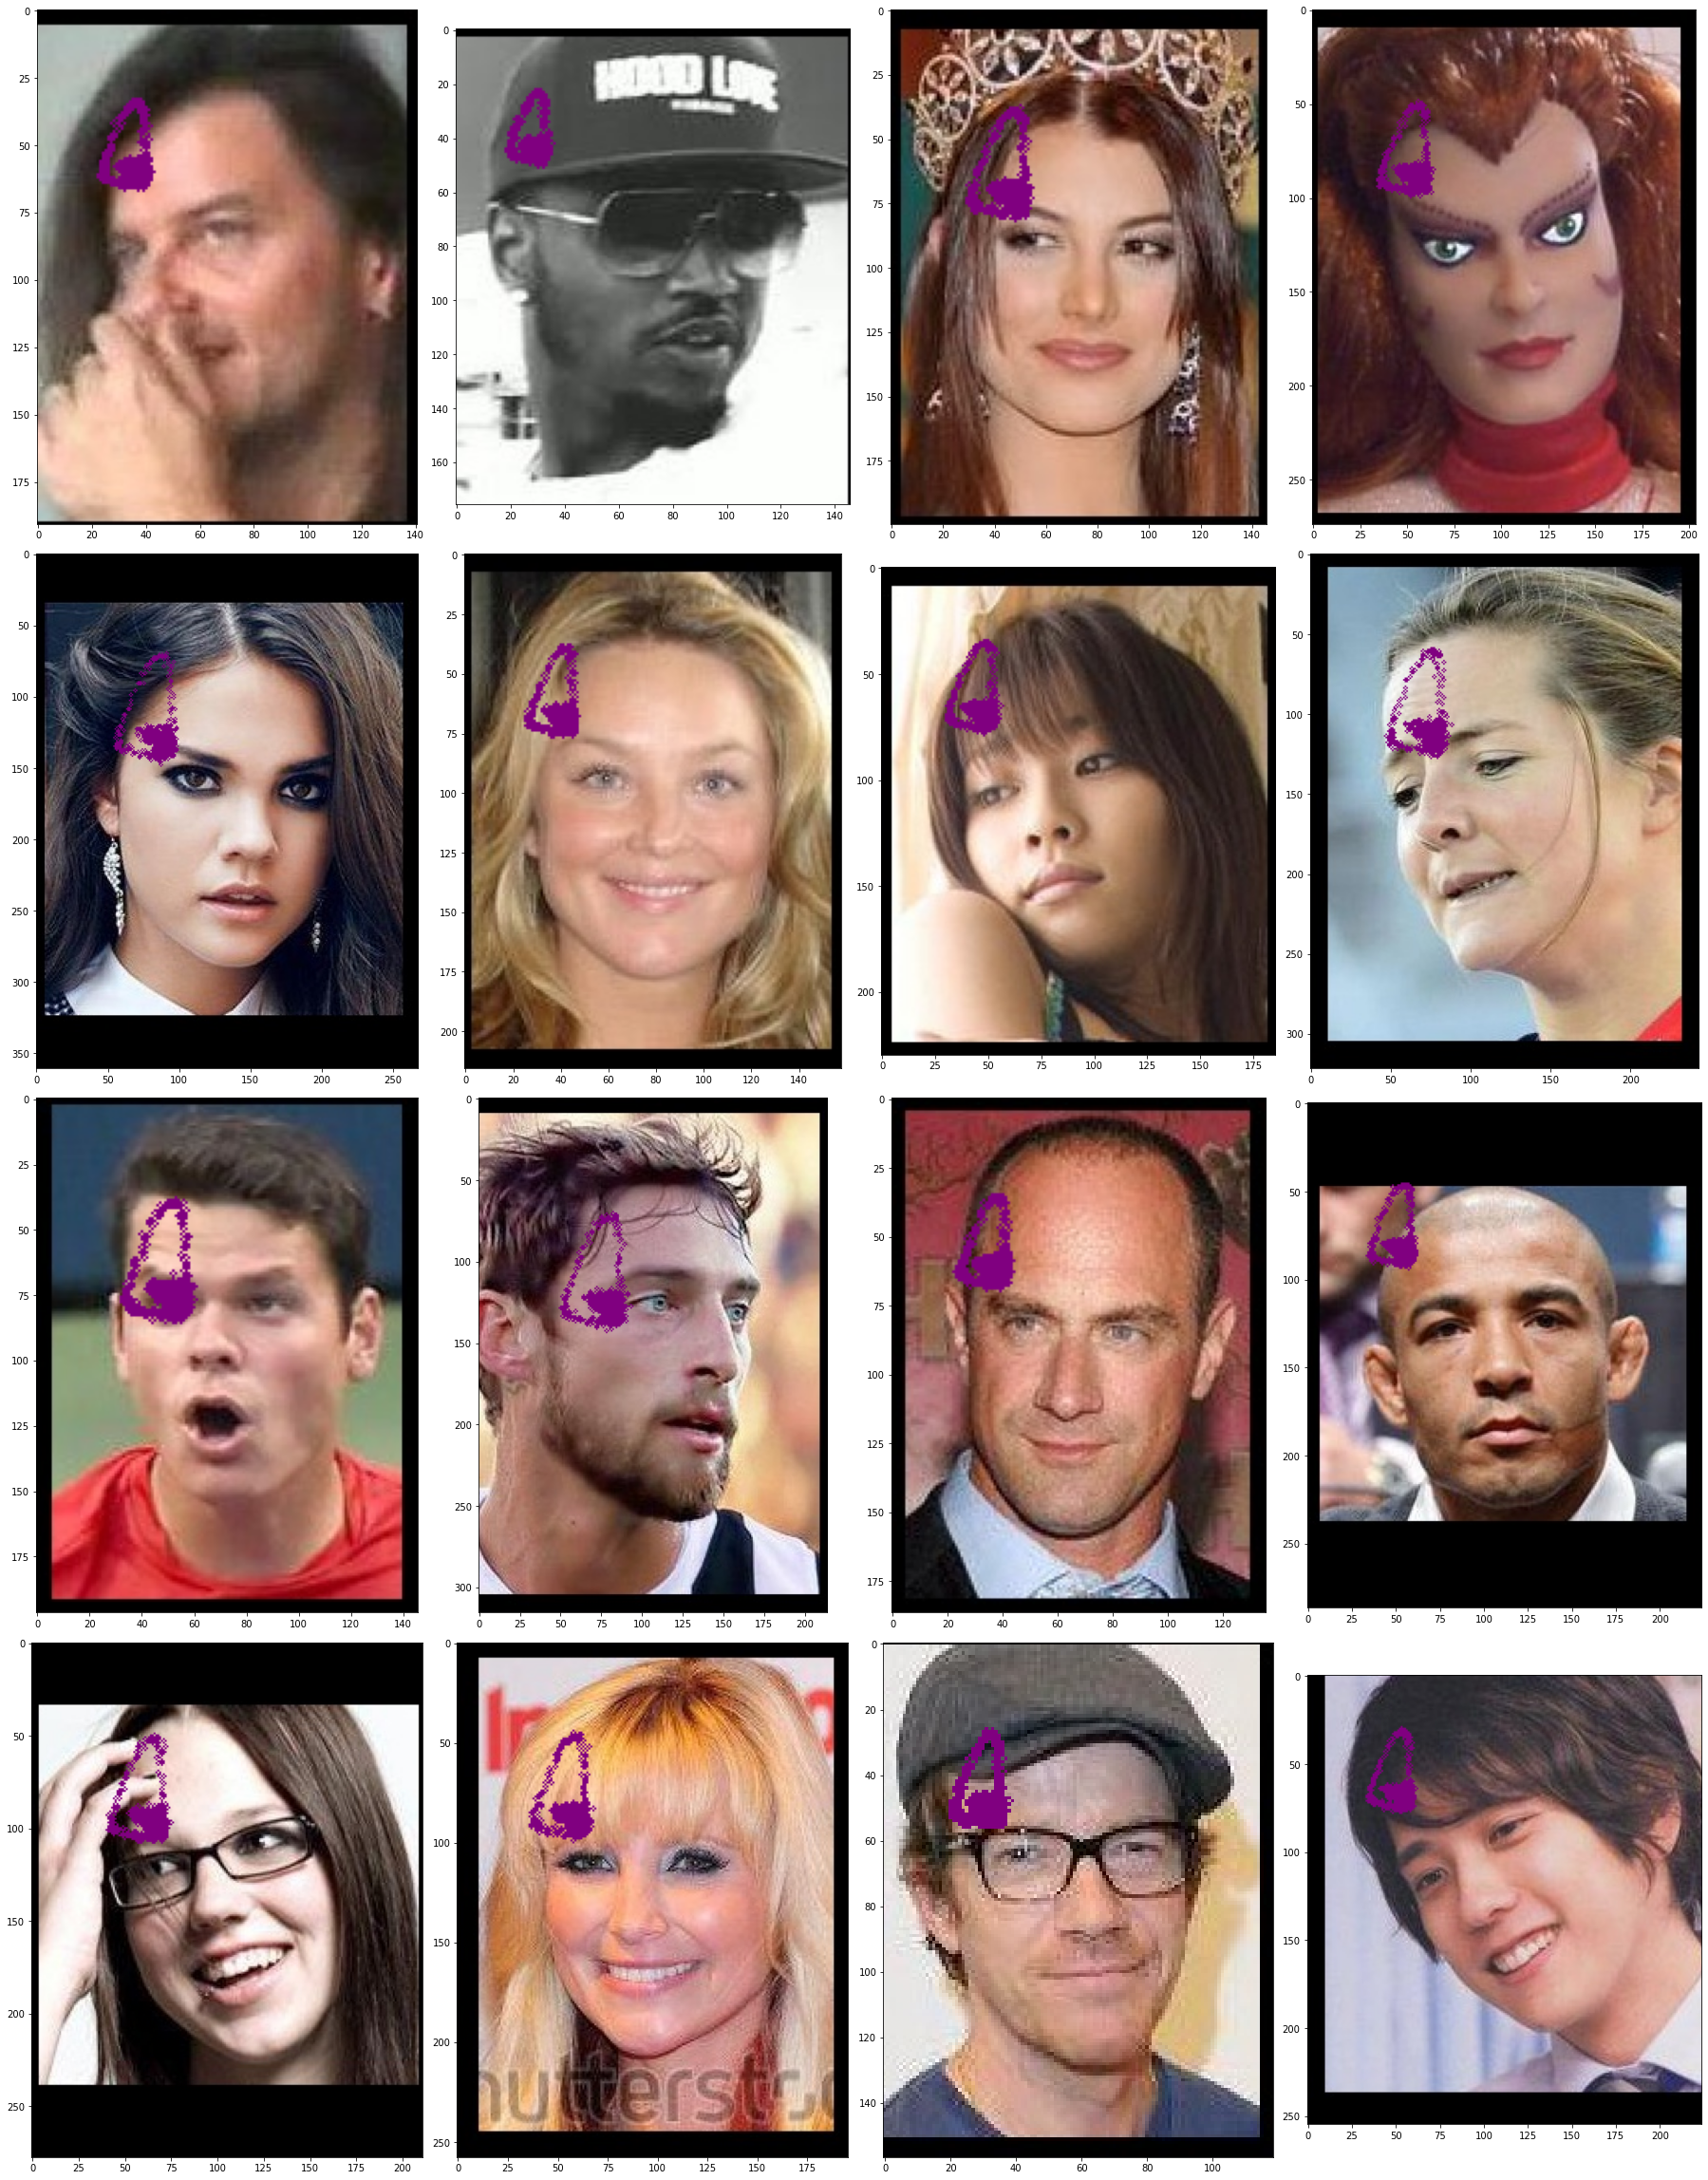

In [11]:
random_idxs = np.random.choice(len(image_names), size=min(NUM_IMAGES_TO_SHOW, len(image_names)), replace=False)

plt.figure(figsize=(25, NUM_ROWS * 8))
for i, idx in enumerate(random_idxs, 1):
    image = cv2.imread(image_names[idx])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = draw_landmarks(image, landmarks[idx])
    
    plt.subplot(NUM_ROWS, NUM_COLS, i)
    plt.imshow(image)

plt.tight_layout()
plt.show()